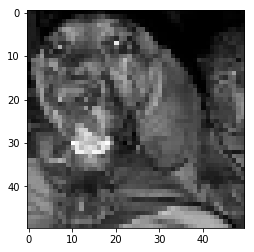

In [132]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import shuffle
import os     


#STANFORDS DOG DATATSET  #Source:  http://vision.stanford.edu/aditya86/ImageNetDogs/ #kaggle

#120 categories



# Number of images: 20,580
# Annotations: Class labels, Bounding boxes


# Inspiration

# Can you correctly identify dog breeds that have similar features, such as the basset hound and bloodhound?





#NOTE

#THIS IS A SIMPLIFIED VERSION OF THE STANDFORDS DATASET WITH ALL OTHER FEATURES BUT LESS AMOUNT OF IMAGES






# Can you correctly identify dog breeds that have similar features, such as the basset hound and bloodhound?

#Solution



#load dataset
train_dir = 'stanfords dog/train/'
test_dir = 'stanfords dog/test/'


#CATEGORIES OF CLASSIFICATIONS
CATEGORIES = ["n02088238-basset", "n02088466-bloodhound"]

#IMAGE SIZE
IMG_SIZE = 50


#ITERATE THROUGH CATEGORY
for category in CATEGORIES:  
  path = os.path.join(train_dir,category)  # create path to basset and bloodhounds


#LOOP THROUGH IMAGE IN THE PATH
  for img in os.listdir(path):  # iterate over each image per dogs and cats





       #USING CV2 TO CONVERT TO IMAGE ARRAY AND CHANGE COLOUR TO GREYSCALE

#CONVERT TO ARRAY
#&
#CONVERT TO GREYSCALE COLOUR
#THIS IS BECAUSE IT HELPS TO SCALE THE VALUES OF THE IMAGE TO A LOWER ONE, UNLIKE COLOURED
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  

#TO DISPLAY ALL IMAGES IN THE 2 FOLDERS
#         plt.imshow(img_array, cmap='gray')  # graph it
#         plt.show()  # display!




#RESIZE IMAGE ARRAY
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

#TO DISPLAY IMAGE AFTER RESIZING:
plt.imshow(new_array, cmap='gray')
plt.show()

#NOTE : OUTPUT APPEARS BLUR BECAUSE OF RESIZING

In [18]:
#CREATE THE TRAINING DATA FOR TRAINING

training_data = []

def create_training_data():
  
  for category in CATEGORIES:  # do basset and bloodhounds

# create path to dogs and cats

        path = os.path.join(train_dir,category)

# get the classification  (0 or a 1). 0=basset 1=bloodhound USING INDEX

        class_num = CATEGORIES.index(category)  
        
        
        
        
        for img in os.listdir(path):
            try:
            # convert to array
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)

            # # resize to normalize data size
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                
            #or #img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX) 


            #APPEND TO TRAINING DATA DEFINED ABOVE
                training_data.append([new_array, class_num])


        # in the interest in keeping the output clean..
                
            except Exception as e:  
                pass

     


create_training_data()
#PRINT  LENGTH 
print(len(training_data))

#OUTPUT: 200: MEANS THERE ARE 100 IMAGE FILES IN THE BASSET AND BLOODHOUND, A TOTAL MAKES IT 200
       

200


In [116]:
 # TO BALANCE CAT AND DOG NUMBER TO AID MODELS LEARNING AND PREDICTION WE RESHUFFLE


#RESHUFFLE


import random

random.shuffle(training_data)


#ITERATE THROUGH TRAINING DATA TILL 10
for sample in training_data[:5]:
    print(sample[1])


#X = FEATURE
#y = LABEL



1
0
0
1
0


In [20]:
#X = FEATURE
#y = LABEL


     #TO PUT SHUFFLED DATA IN X AND Y VARIABLES


X = []
y = []



for features,label in training_data:


#APPEND FEATURES AND LABELS
    X.append(features)
    y.append(label)




In [21]:
#NOTE WE HAVE TO CONVERT X TO NUMPY BECAUSE OF KERAS


#TO PRINT THE RESHAPE NUMPY ARRAY
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

#RESHAPE
#-1:ANY NUMBER
#1: GREYSCALE COLOUR

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



[[[[152]
   [158]
   [144]
   ...
   [231]
   [228]
   [233]]

  [[157]
   [160]
   [156]
   ...
   [214]
   [227]
   [228]]

  [[142]
   [113]
   [160]
   ...
   [205]
   [226]
   [220]]

  ...

  [[ 99]
   [ 99]
   [ 96]
   ...
   [130]
   [120]
   [127]]

  [[133]
   [118]
   [ 93]
   ...
   [114]
   [109]
   [119]]

  [[135]
   [120]
   [ 73]
   ...
   [107]
   [124]
   [129]]]]


In [23]:

#OPTIONAL 


#TO SAVE IN PICKLE


import pickle

#FOR X FEATURE VARIABLE

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()



#FOR Y LABEL VARIABLE
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()




#TO LOAD PICKLE

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)





        


In [130]:
#TO LOAD PICKLE

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


#OPTIONALLY YOU CAN ANALYSE TRAINNING WITH TENSOR BOARD 
#ANALYSING WITH TENSORBOARD ,#NOOTE : AFTER TRAINING YOU CAN VEIW  TENSORBOARD USING tensorboard --logdir='logs/" ON COMMANDLINE

# from tensorflow.keras.callbacks import TensorBoard




# NAME = "bassetbloodhound-CNN"


# #ADD DIRECTORY TO TENSORBOARD
# tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))






#USING TENSORFLOW KERAS FOR TRAINING


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D






 #TO NORMALISE OR SCALE
  #DIVIDE BY MAXIMIMUM FROM FROM THE DATASET WHICH IS 200
X = X/200.0



  #BUILDING THE MODEL

model = Sequential()



   #ADD FIRST LAYER

  #ADD CONV2D LAYER
#256: UNIT
#(3, 3): WINDOW

model.add(Conv2D(200, (3, 3), input_shape=X.shape[1:]))

   #ADD RELU ACTIVATION
model.add(Activation('relu'))

   #ADD MAX POOLING OF 2 BY 2
model.add(MaxPooling2D(pool_size=(2, 2)))



   #ADD SECOND LAYER

model.add(Conv2D(200, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

 # this converts our 3D feature maps to 1D feature vectors BEACUSE OF DENSE

model.add(Flatten())




  #ADD A FINAL DENSE LAYER
model.add(Dense(64))


    #OUTPUT LAYER   
model.add(Dense(1))

   #ADD  ANOTHER ACTIVTOION
model.add(Activation('sigmoid'))


#COMPILE MODEL
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



  #TRAIN MODEL
model.fit(X, y, batch_size=32, epochs=20, validation_split=0.3)  #include #callbacks=[tensorboard] if using tensorboard

model.save("bassetbloodhound-CNN")

Train on 140 samples, validate on 60 samples
Epoch 1/20
140/140 [==============================] - 6s 43ms/sample - loss: 1.2388 - acc: 0.4571 - val_loss: 0.6924 - val_acc: 0.5167
Epoch 2/20
140/140 [==============================] - 3s 23ms/sample - loss: 0.6954 - acc: 0.4714 - val_loss: 0.6884 - val_acc: 0.5500
Epoch 3/20
140/140 [==============================] - 3s 24ms/sample - loss: 0.6737 - acc: 0.5500 - val_loss: 0.7408 - val_acc: 0.4833
Epoch 4/20
140/140 [==============================] - 3s 24ms/sample - loss: 0.6865 - acc: 0.6000 - val_loss: 0.6753 - val_acc: 0.7500
Epoch 5/20
140/140 [==============================] - 3s 23ms/sample - loss: 0.6500 - acc: 0.5857 - val_loss: 0.6527 - val_acc: 0.6000
Epoch 6/20
140/140 [==============================] - 3s 24ms/sample - loss: 0.5998 - acc: 0.6643 - val_loss: 0.6088 - val_acc: 0.7667
Epoch 7/20
140/140 [==============================] - 3s 24ms/sample - loss: 0.5251 - acc: 0.7857 - val_loss: 0.6721 - val_acc: 0.5833
Epoch 8/20

prediction of the inputted image is


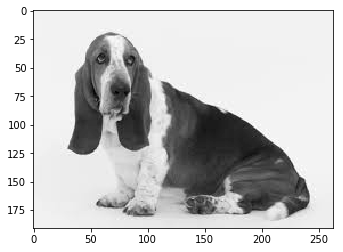

[[0.]]
n02088238-basset


In [134]:
 #PREDICTING IF A DOG IMAGE IS A BASSET OR BLOOODHOUND USING OUR SAVED  MODEL

    
#NOTE:  0=basset 1=bloodhound

                        
def processexternalimage(filepath):

    #DEFINE IMAGE SIZE
    IMG_SIZE = 50  # 50 in txt-based

    #USE CV2 TO READ IN GRAYSCALE
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    #USE CV2 TO RESIZE TO IMAGE SIZE
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    
      #TO DISPLAY
    plt.imshow(img_array, cmap='gray')
    plt.show()     


    
    

   #RESHAPE THE IMAGE SIZE WITH -1 AND 1
    
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)










#USING THE PREVIOUSLY TRAINED MODEL FOR PREDICTING A BASSET OR BLOODHOND



#LOAD IN SAVED TRAINED MODEL

model = tf.keras.models.load_model("bassetbloodhound-CNN.model")

    
#PREDICT


print ("prediction of the inputted image is")

  #PASS ANY DOG IMAGE FILE IN THE PREDICT
    
  #HERE WE ARE PASSING A DOWNLOADED IMAGE FROM GOOGLE
prediction = model.predict([processexternalimage('downloadba.jpg')])
print(prediction)


#OUTPUT: IT PREDICTS O FOR A BASSET DOG AND 1 FOR A BLOODHOUND DOG




#TO PRINT IN STRING FORMAT
print(CATEGORIES[int(prediction[0][0])])





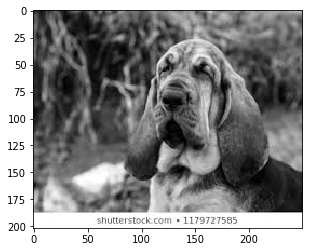

[[0.]]
n02088238-basset


In [135]:
prediction2 = model.predict([processexternalimage('downloading.jpg')])
print(prediction2)

print(CATEGORIES[int(prediction2[0][0])])
